### Tarefas :)
- missing values - ines  5)
- outliers - isa     6)
- inconsistencias - ir pondo   2)
- feature selection - ines    8)  
<p><s>- tipos de variáveis - joana  1)</s></p>
<p><s>- PCA - joana    11)</s></p>
- fazer variáveis novas - ines      4)
- gráficos, histogramas, correlações - isa  3)
- heatmap -isa      7)
- relatório lmao - todas :D
<p><s>- scale data,</s></p>
- ordinal encoder    9)
<p><s>- dummify - joana    10)</s></p>
- 


In [1]:
print("hello world")

hello world


<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 1. Imports
    
</div>

In [102]:
#!pip install pyreadstat

In [2]:
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 2. Load Datasets
    
</div>

In [3]:
df, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [4]:
df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [5]:
#Check for dupicate rows
df['CustID'].nunique()

10296

In [6]:
df.set_index('CustID', inplace = True)

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 3. Data Exploration
    
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10296 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


From here we can see that some variables are keep as float although thats is not the most appropiate variable type for them. We are going to correct them now so we can explore the data easier. We can also see that we have a lot of variables with missing values.

In [7]:
df.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

### Changing Data Types

The variables <code>BirthYear</code>, <code>FirstPolYear</code>, <code>GeoLivArea</code> and <code>Children</code> are discrete, so they should be integers.

In [8]:
df[(round(df['BirthYear']) != df['BirthYear'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
420.0,1987.0,NaN,2 - High School,3219.0,1.0,1.0,379.30,0.33,404.52,42.80,152.25,7.78,-0.11
756.0,NaN,NaN,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
1874.0,1995.0,NaN,1 - Basic,517.0,1.0,1.0,-238.93,1.19,63.68,692.90,98.13,151.14,126.47
1929.0,1983.0,NaN,2 - High School,2426.0,4.0,1.0,163.80,0.74,286.83,158.35,181.48,72.57,30.45
2562.0,1976.0,NaN,2 - High School,3253.0,1.0,1.0,-44.44,1.03,298.61,13.90,191.37,49.01,33.34
2706.0,1978.0,NaN,3 - BSc/MSc,3614.0,4.0,0.0,356.96,0.54,381.96,274.50,117.91,35.45,12.89
3182.0,1987.0,NaN,2 - High School,3954.0,2.0,0.0,-25.00,1.00,233.60,206.70,265.94,36.45,21.67
3284.0,1983.0,NaN,3 - BSc/MSc,2433.0,1.0,1.0,289.06,0.52,321.84,83.90,238.60,3.89,3.89
3761.0,NaN,NaN,2 - High School,2067.0,1.0,1.0,-47.67,1.04,495.87,58.90,61.90,22.67,3.78


In [9]:
df['BirthYear'] = df['BirthYear'].astype('Int32')
df['BirthYear'].dtype

Int32Dtype()

In [10]:
#see if there are any years in which the value is a float (has decimals) - which would be an inconsistency
df[(round(df['FirstPolYear']) != df['FirstPolYear'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
297.0,NaN,1955,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
756.0,NaN,<NA>,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
897.0,NaN,1960,,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
2228.0,NaN,1979,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2450.0,NaN,1939,,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2704.0,NaN,1977,1 - Basic,2105.0,2.0,NaN,302.62,0.54,299.28,167.25,162.92,28.34,51.01
2729.0,NaN,1954,,3200.0,2.0,0.0,109.25,0.77,211.93,14.45,275.72,77.68,11.67
2771.0,NaN,1984,,1473.0,4.0,1.0,443.74,0.31,386.74,104.45,156.92,5.00,27.45
2927.0,NaN,1982,3 - BSc/MSc,1817.0,2.0,NaN,420.32,0.26,466.42,-10.55,112.91,12.89,16.89


In [11]:
df['FirstPolYear'] = df['FirstPolYear'].astype('Int32')
df['FirstPolYear'].dtype

Int32Dtype()

In [13]:
#see if there are any geograhic areas in which the value is a float (has decimals)
df[(round(df['GeoLivArea']) != df['GeoLivArea'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
297.0,<NA>,1955,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.0,130.58,0.89,12.89


In [14]:
df['GeoLivArea'] = df['GeoLivArea'].astype('Int32')
df['GeoLivArea'].dtype

Int32Dtype()

In [15]:
#see if there are any children in which the value is a float (has decimals)
df[(round(df['Children']) != df['Children'])]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
297.0,<NA>,1955,4 - PhD,3591.0,<NA>,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
620.0,1980,1994,3 - BSc/MSc,1333.0,2,NaN,312.52,0.40,286.83,-6.10,175.70,52.90,56.79
773.0,1998,1949,2 - High School,3601.0,2,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
2228.0,<NA>,1979,3 - BSc/MSc,1987.0,2,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2363.0,1981,1975,2 - High School,1607.0,2,NaN,271.51,0.64,292.61,308.40,159.14,11.89,59.68
2672.0,1992,1988,2 - High School,1140.0,2,NaN,356.40,0.54,168.03,265.60,273.94,68.79,52.23
2704.0,<NA>,1977,1 - Basic,2105.0,2,NaN,302.62,0.54,299.28,167.25,162.92,28.34,51.01
2927.0,<NA>,1982,3 - BSc/MSc,1817.0,2,NaN,420.32,0.26,466.42,-10.55,112.91,12.89,16.89
3178.0,1980,1975,3 - BSc/MSc,2647.0,2,NaN,392.19,0.37,404.41,107.25,110.80,24.56,12.78


In [16]:
df['Children'] = df['Children'].astype('Int32')
df['Children'].dtype

Int32Dtype()

### Continuing with data exploration

In [17]:
df.describe()

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


The variable <code>BirthYear</code> has an impossible minimum value. The variable <code>FirstPolYear</code> also has a impossible maximum value. 

In [18]:
 df.describe(include="O").T

,count,unique,top,freq
EducDeg,10296,5,3 - BSc/MSc,4799


### Check inconsistencies

In [19]:
df['BirthYear'].sort_values(ascending=True).head() #temos este 1028 que n faz sentido nenhum

CustID
7196.0    1028
7441.0    1935
7957.0    1935
330.0     1935
3455.0    1935
Name: BirthYear, dtype: Int32

We only have one value that does not make sense: 1028. Now we want to see if there are people that have their FirstPolYear before the BirthYear

In [8]:
df[df['FirstPolYear'] < df['BirthYear']]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
14.0,1983.0,2000.0,1 - Basic,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
19.0,1981.0,1982.0,1 - Basic,1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57
23.0,1976.0,1986.0,2 - High School,1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
41.0,1994.0,1995.0,2 - High School,1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10269.0,1987.0,1988.0,3 - BSc/MSc,1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10274.0,1989.0,1992.0,2 - High School,1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10285.0,1980.0,1987.0,3 - BSc/MSc,1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN


There are 1997 people that have policies that were done before they were even born.

In [21]:
df[(df['BirthYear'] >2000) & (df['PremHousehold']>0)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
660.0,1991,2001,1 - Basic,1284.0,4,1,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
690.0,1997,2001,1 - Basic,1180.0,3,1,436.10,0.48,54.90,406.20,65.79,112.02,256.05
866.0,1979,2001,1 - Basic,562.0,1,1,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
1437.0,1989,2001,1 - Basic,823.0,4,0,281.28,0.60,129.58,177.80,58.01,176.70,218.15
2580.0,1986,2001,1 - Basic,1006.0,4,0,267.95,0.67,48.23,396.75,291.50,127.58,24.45
3147.0,1994,2001,1 - Basic,372.0,4,1,488.76,0.36,60.68,270.60,177.59,182.48,107.13
4466.0,1978,2001,1 - Basic,958.0,4,0,-204.59,1.11,28.56,1359.15,68.79,38.23,179.59
4484.0,1983,2001,1 - Basic,1241.0,3,1,909.17,0.13,43.34,589.55,142.47,121.80,179.48
5348.0,1980,2001,1 - Basic,1119.0,3,1,796.71,0.23,148.14,628.45,221.82,45.12,30.23


In [22]:
df.groupby('EducDeg')['BirthYear'].max()

EducDeg
                   1993
1 - Basic          2001
2 - High School    1998
3 - BSc/MSc        1996
4 - PhD            1993
Name: BirthYear, dtype: Int32

In [23]:
df[(df['MonthSal'] <0)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,


In [24]:
df[(df['ClaimsRate'] <0)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,


### Value Counts

In [25]:
for col in df.columns:
    if df[col].dtype!="float64":
        print('-' * 40 + col + '-' * 40 , end=' - ')
        display(df[col].value_counts(dropna=False))

----------------------------------------FirstPolYear---------------------------------------- - 

1988     512
1994     475
1993     473
1989     466
1984     464
1986     458
1977     453
1978     453
1992     451
1990     449
1981     445
1995     445
1982     444
1979     443
1996     440
1987     438
1976     433
1980     432
1991     430
1985     429
1983     423
1975     285
1997     271
1974     141
1998     112
<NA>      30
53784      1
Name: FirstPolYear, dtype: Int64

----------------------------------------BirthYear---------------------------------------- - 

1962    206
1968    200
1964    194
1953    193
1981    190
       ... 
2000     35
<NA>     17
1935     14
2001     12
1028      1
Name: BirthYear, Length: 69, dtype: Int64

----------------------------------------EducDeg---------------------------------------- - 

3 - BSc/MSc        4799
2 - High School    3510
1 - Basic          1272
4 - PhD             698
                     17
Name: EducDeg, dtype: int64

----------------------------------------GeoLivArea---------------------------------------- - 

4       4145
1       3048
3       2066
2       1036
<NA>       1
Name: GeoLivArea, dtype: Int64

----------------------------------------Children---------------------------------------- - 

1       7262
0       3013
<NA>      21
Name: Children, dtype: Int64

<p>The variable <code>FirstPolYear</code> has one person with the impossible value of 53784.</p>
<p>The variable <code>BirthYear</code> has one person with the impossible value of 1028.</p>
<p>The variable <code>EducDeg</code> has 17 missing values that are cells that are completly blank.</p>


### Distribuition Graphs

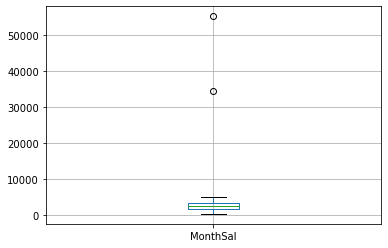

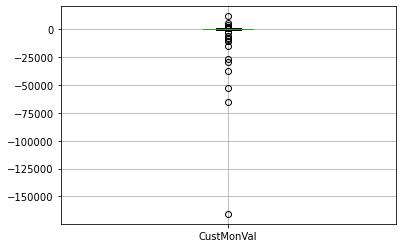

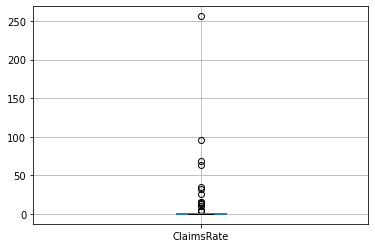

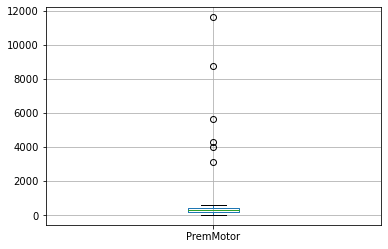

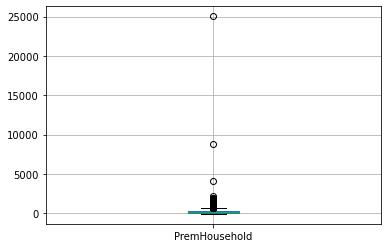

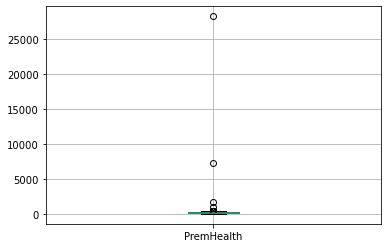

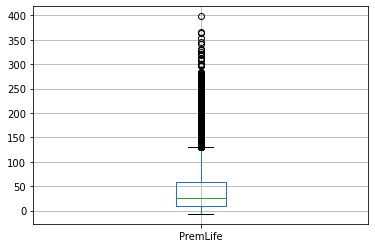

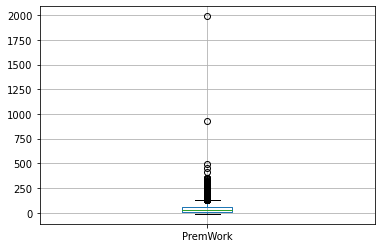

In [26]:
for col in df.columns:
    if df[col].dtype=="float64":
        fig=plt.figure()
        df.boxplot(col)

From the previous output there are several conclusions we can take:
- MonthSal: has extreme values (above 30000€). These values are considered outliers, because they are very far from the rest of the distribution.
- CustMonVal: has a skewed distribution. There is an extreme outlier below -150000€. 
- ClaimsRate: also has a very skewed distribution, with an outlier above 250
- PremMotor: has several outliers, we can consider above 6000 as an outlier, for example
- PremHousehold: it is a skewed distribution with an extreme outlier 25000+
- PremLife: has a skewed distribution but doesn't seem to have many outliers
- PremWork: has a skewed distribution, with one outlier, above 1750.

In the outlier section we will explore these outliers in more depth and decide on how to handle them.

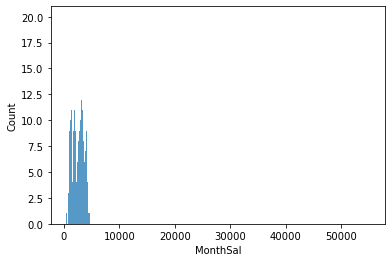

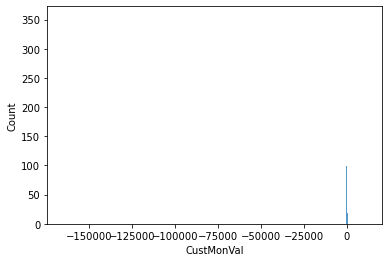

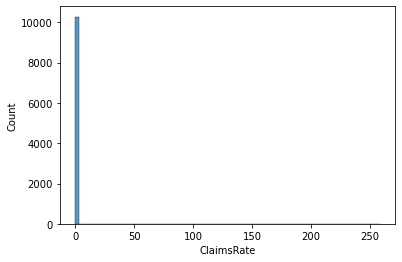

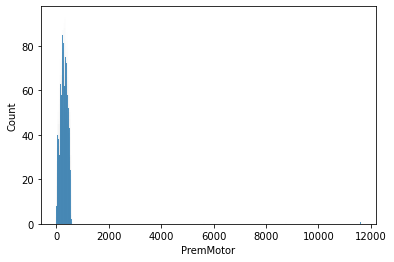

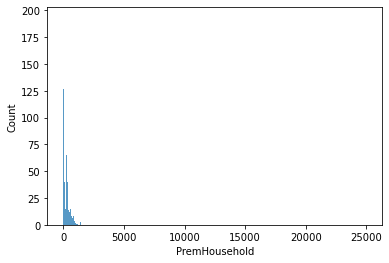

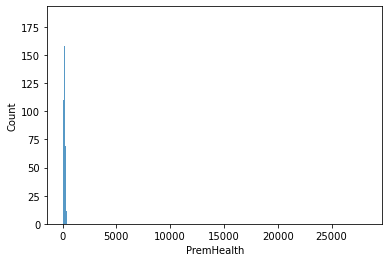

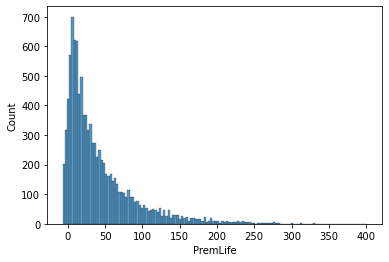

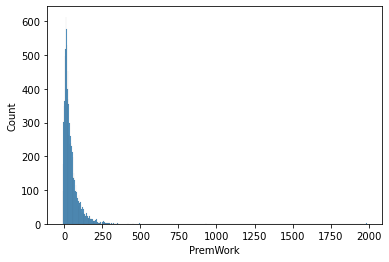

In [27]:
for col in df.columns:
    if df[col].dtype=="float64":
        fig=plt.figure()
        sns.histplot(data=df, x=col, binwidth=3)

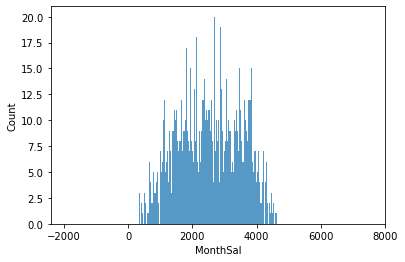

In [28]:
sns.histplot(data=df, x="MonthSal", binwidth=3)
plt.xlim(None, 8000)
plt.show()

After zooming in the histogram, we can see that the variable *MonthSal* has an almost Normal distribution

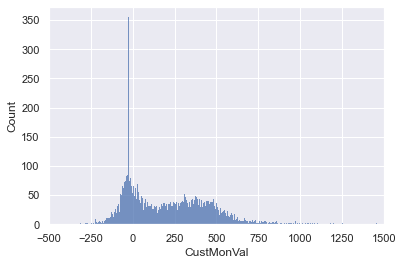

In [130]:
sns.histplot(data=df, x="CustMonVal", binwidth=3)
plt.xlim(-500, 1500)
plt.show()

We can see from the graph that there is a high number of customers with a specific value below zero

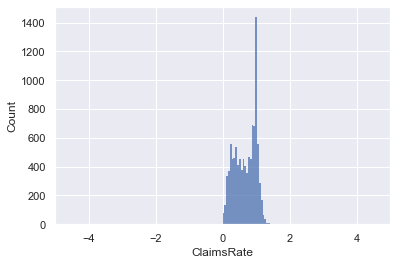

In [131]:
sns.histplot(data=df, x="ClaimsRate")
plt.xlim(-5, 5)
plt.show()

In [29]:
df['ClaimsRate'].value_counts()

1.00     457
1.01     212
1.02     203
0.99     198
1.03     195
        ... 
96.00      1
13.90      1
12.60      1
35.00      1
1.51       1
Name: ClaimsRate, Length: 165, dtype: int64

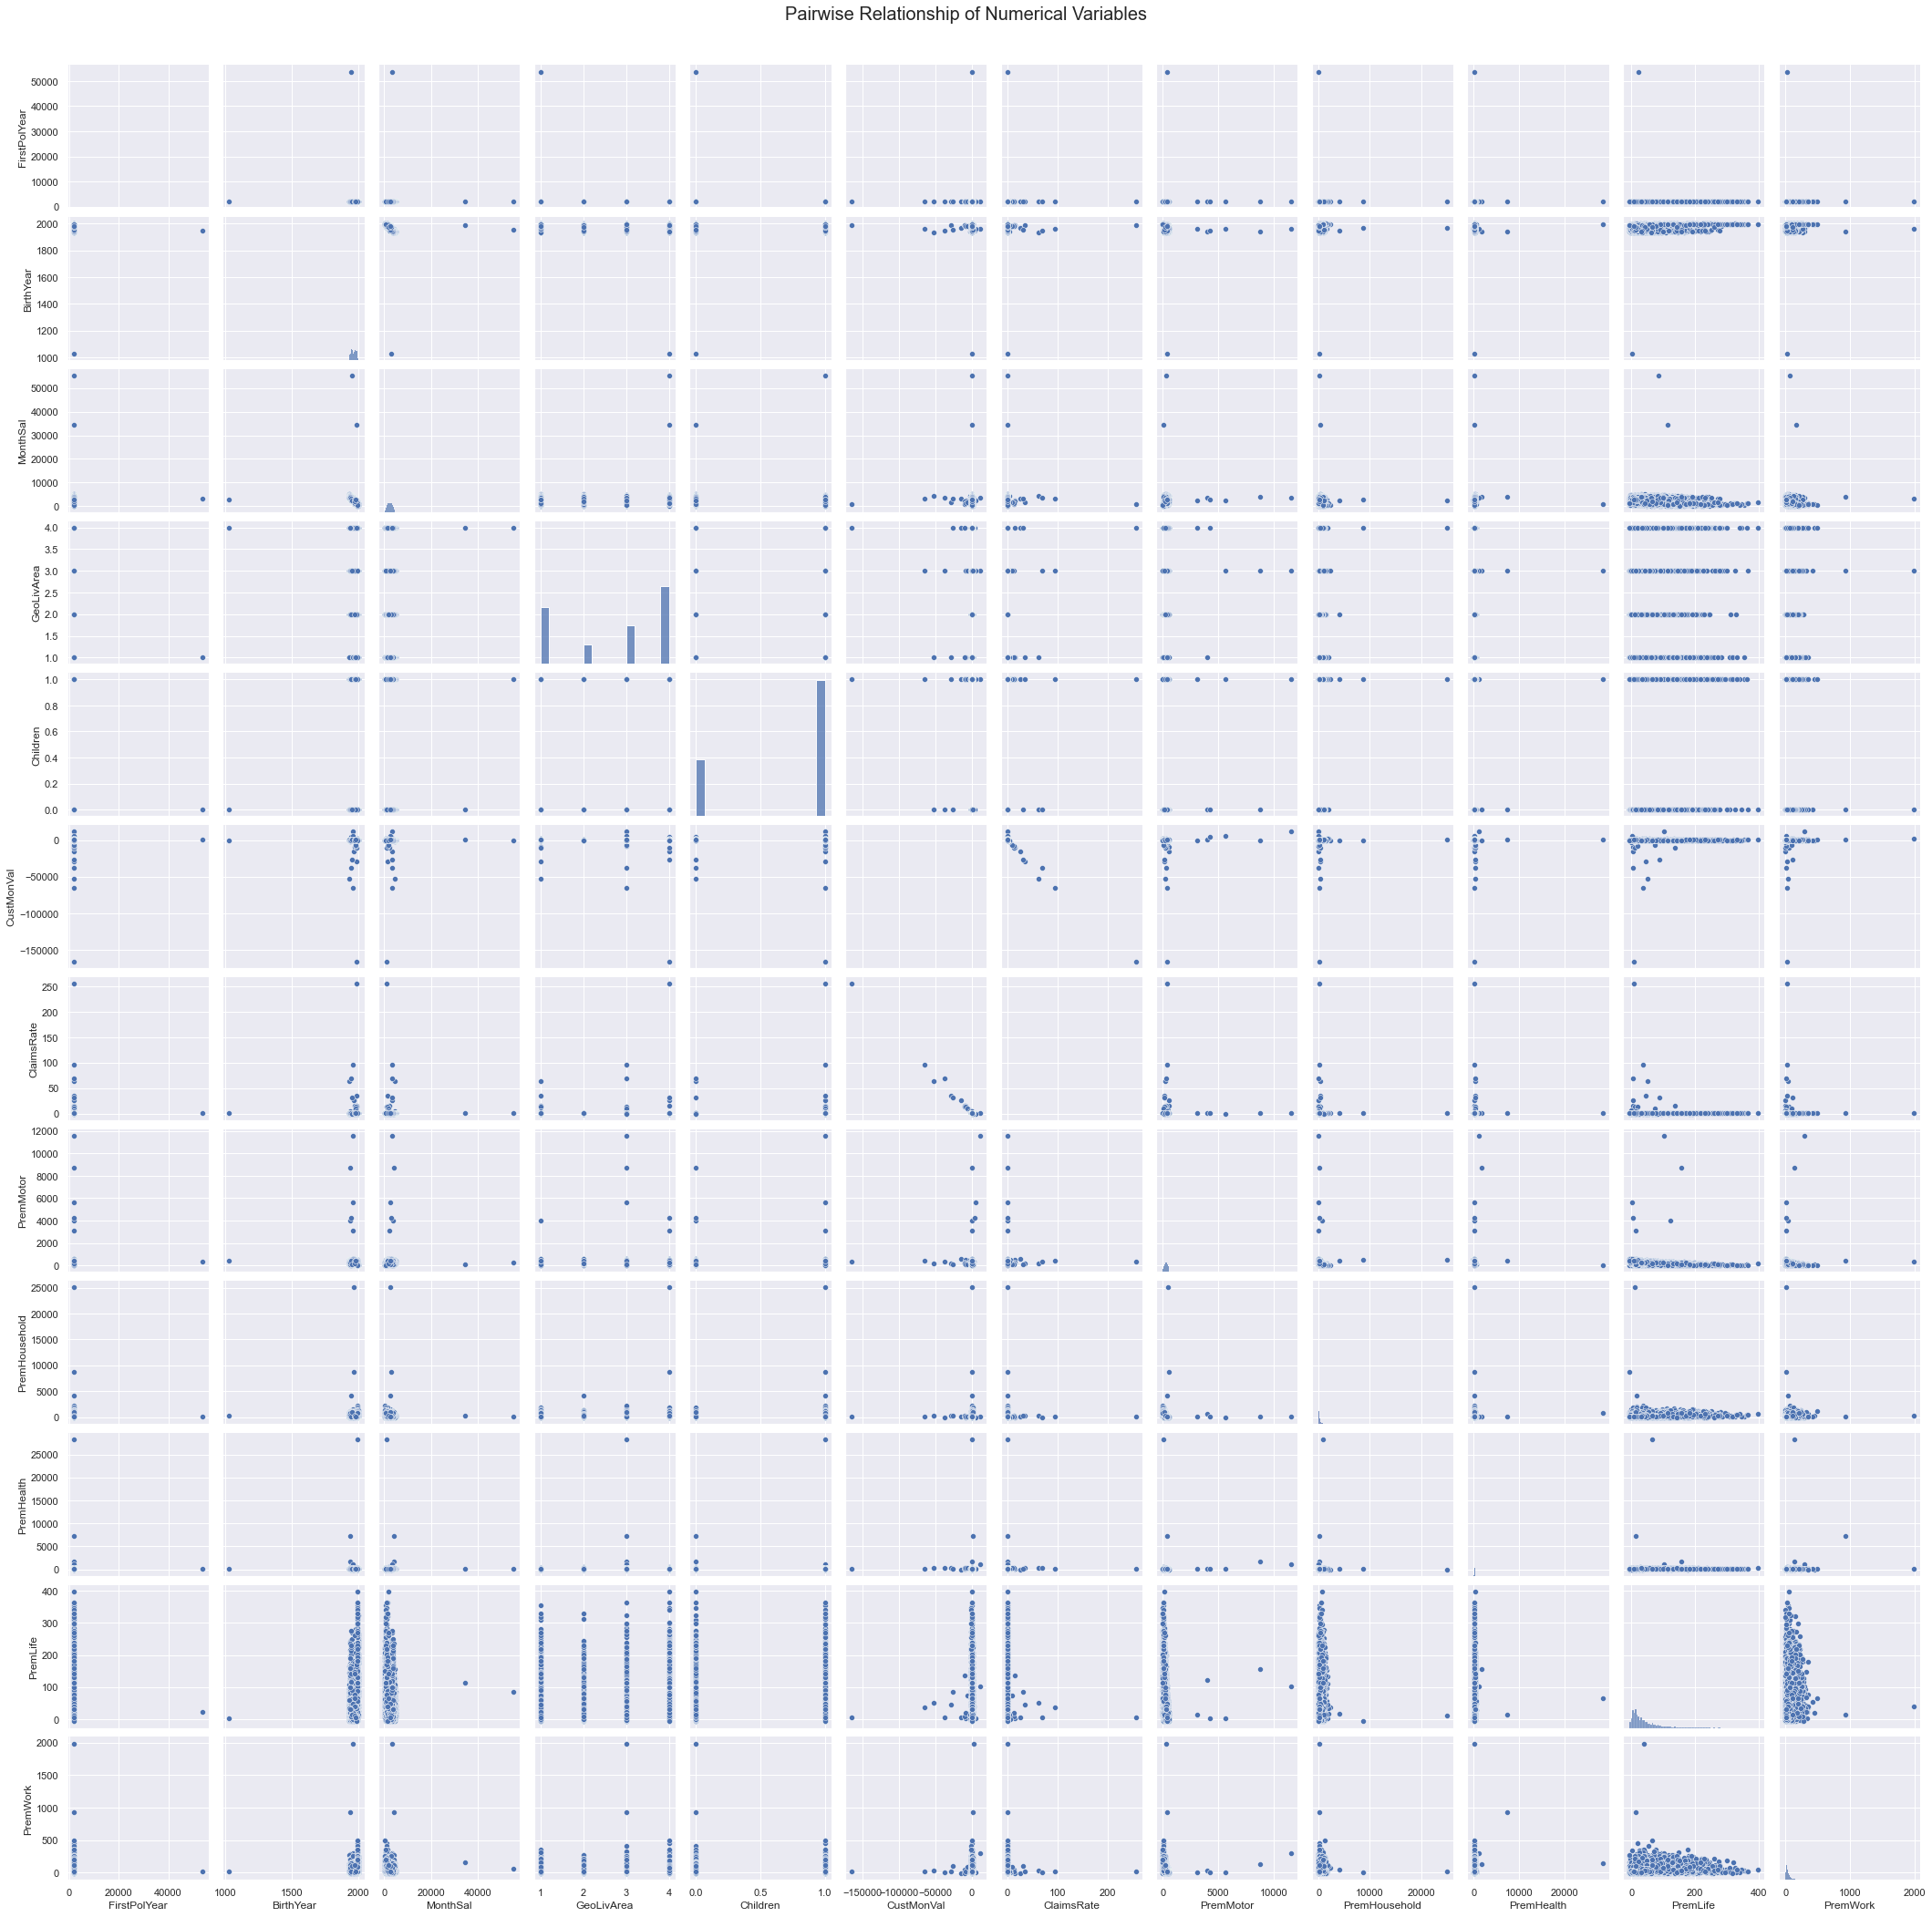

In [133]:

# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

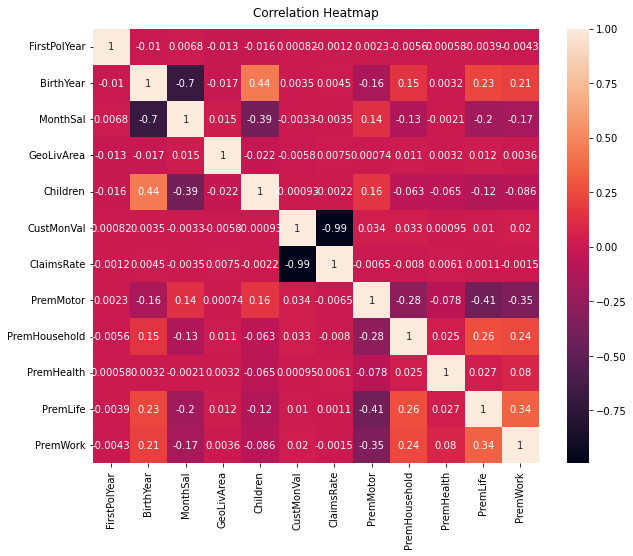

In [30]:
# Pairwise Relationship of Numerical Variables
plt.figure(figsize=(10, 8))
heatmap=sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the heatmap above, it is evident that there are some variables that are highly linearly correlated. In the code below those relationships are explored in more detail.

<AxesSubplot:xlabel='ClaimsRate', ylabel='CustMonVal'>

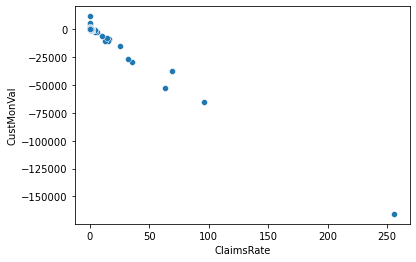

In [31]:
sns.scatterplot(data=df, x='ClaimsRate', y='CustMonVal')

According to the metadata:
- CMV Customer Monetary Value -> Lifetime value = (annual profit from customer) * (nº of years that they are a customer) - (acquisition cost)
- Claims Rate -> Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years



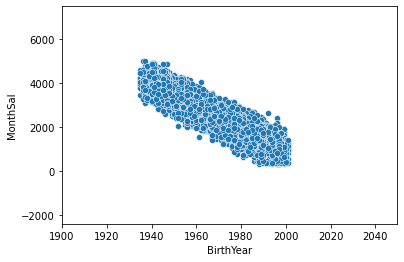

In [32]:
sns.scatterplot(data=df, x='BirthYear', y='MonthSal')
plt.xlim(1900, None)
plt.ylim(None, 7500)
plt.show()
#see in the range without outliers

In [37]:
sns.histplot(data=df, x='BirthYear', hue = 'Children')
plt.xlim(1900, None)
plt.show()

AttributeError: 'int' object has no attribute 'view'

<AxesSubplot:xlabel='PremLife', ylabel='PremMotor'>

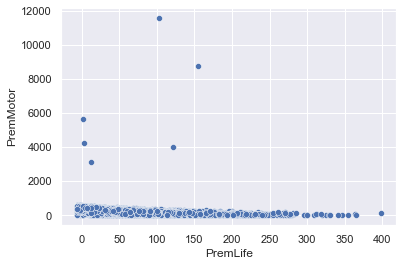

In [138]:
sns.scatterplot(data=df, x='PremLife', y='PremMotor')

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
    
# 4. Data Cleaning
    
</div>

In [139]:
#making the blank spaces in education a nan
df.replace("", np.nan, inplace=True) 

In [140]:
df['EducDeg'].value_counts(dropna=False)

3 - BSc/MSc        4799
2 - High School    3510
1 - Basic          1272
4 - PhD             698
NaN                  17
Name: EducDeg, dtype: int64

### Outliers

From the previous output there are several conclusions we can take:

MonthSal: has extreme values (above 30000€). These values are considered outliers, because they are very far from the rest of the distribution.
CustMonVal: has a skewed distribution. There is an extreme outlier below -150000€.
ClaimsRate: also has a very skewed distribution, with an outlier above 250
PremMotor: has several outliers, we can consider above 6000 as an outlier, for example
PremHousehold: it is a skewed distribution with an extreme outlier 25000+
PremLife: has a skewed distribution but doesn't seem to have many outliers
PremWork: has a skewed distribution, with one outlier, above 1750.
In the outlier section we will explore these outliers in more depth and decide on how to handle them.

#### MonthSal

In [141]:
df[df['MonthSal']>30000]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
5883.0,1995,1956,2 - High School,55215.0,4,1,122.25,0.79,281.83,147.25,130.58,84.46,66.68
8262.0,1981,1991,2 - High School,34490.0,4,0,608.89,0.28,57.01,358.95,195.26,113.80,161.14


Since there are only 2 observations with this problem, it will not impact the dataset in a major way. So we can remove them.

In [142]:
df= df[df['MonthSal']<=30000]

#### CustMonVal:

In [143]:
df[df['CustMonVal']<-150000]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
172.0,1990,1989,3 - BSc/MSc,1086.0,4,1,-165680.42,256.2,378.07,78.9,166.81,6.89,18.45


In [144]:
df=df[df['CustMonVal']>=-150000]

#### ClaimsRate

In [145]:
df[df['ClaimsRate']>250]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,


The only example of a client with a Claims Rate above 250 was removed in the CustMonVal handling of the outliers. 

#### PremMotor

In [146]:
df[df['PremMotor']>6000]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
5212.0,1981,1943,2 - High School,4135.0,3,0,130.14,0.99,8744.61,101.7,1767.00,155.14,130.58
5294.0,1989,1963,3 - BSc/MSc,3564.0,3,1,11875.89,0.09,11604.42,48.9,1045.52,103.13,296.47


In [147]:
df=df[df['PremMotor']<=6000]

#### PremHousehold

In [148]:
df[df['PremHousehold']>25000]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
8867.0,1978,1972,2 - High School,2618.0,4,1,473.54,0.98,508.43,25048.8,36.23,9.89,11.89


In [149]:
df= df[df['PremHousehold']<=25000]

#### PremWork

In [150]:
df[df['PremWork']>1750]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
5085.0,1994,1959,2 - High School,3330.0,3,0,2314.21,0.14,350.51,201.7,125.8,39.23,1988.7


In [151]:
df=df[df['PremWork']<=1750]

### Scaling of Data

In [36]:
scaler = MinMaxScaler().fit(df[['BirthYear','FirstPolYear','MonthSal','CustMonVal','ClaimsRate','PremHousehold','PremHealth','PremLife','PremWork','PremMotor']])
# this will return an array
df[['BirthYear','FirstPolYear','MonthSal','CustMonVal','ClaimsRate','PremHousehold','PremHealth','PremLife','PremWork','PremMotor']] = scaler.transform(df[['BirthYear','FirstPolYear','MonthSal','CustMonVal','ClaimsRate','PremHousehold','PremHealth','PremLife','PremWork','PremMotor']])
df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,0.000212,0.980473,2 - High School,0.033599,1,1,0.935260,0.001522,0.032731,0.006148,0.005251,0.133259,0.014440
2.0,0.000135,0.993834,2 - High School,0.006268,4,1,0.932376,0.004372,0.007027,0.019551,0.004202,0.497113,0.059044
3.0,0.000328,0.968140,1 - Basic,0.035421,3,0,0.935957,0.001093,0.018113,0.011921,0.004481,0.230323,0.055491
4.0,0.000309,0.979445,3 - BSc/MSc,0.013957,4,1,0.933019,0.003864,0.016074,0.004711,0.011080,0.104466,0.020163
5.0,0.000232,0.971223,3 - BSc/MSc,0.026056,4,1,0.933313,0.003513,0.029524,0.004888,0.006532,0.063607,0.026716


### Separating Numerical Variables from Categorical/Binary

In [37]:
df_num=df.select_dtypes('float64')
df_cat = df.select_dtypes(exclude='float64')

In [38]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   MonthSal       10260 non-null  float64
 3   CustMonVal     10296 non-null  float64
 4   ClaimsRate     10296 non-null  float64
 5   PremMotor      10262 non-null  float64
 6   PremHousehold  10296 non-null  float64
 7   PremHealth     10253 non-null  float64
 8   PremLife       10192 non-null  float64
 9   PremWork       10210 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


### Get Dummies

In [39]:
df_dummies = pd.get_dummies(df, columns=['EducDeg'], drop_first=True)

### PCA (need to work the missing first!)

In [40]:
pca = PCA()
pc = pca.fit_transform(df_num)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df_num.columns) + 1)],
    index=df_num.columns
)

#choosing 3 principal components
loadings.iloc[:,:3]

### Define perpectives for our data

In [ ]:
#df_insurance = 

In [ ]:
#df_customers =